1. Understand the Dataset

Introduction: This dataset is a synthetic representation of mobile money transactions created using PaySim, simulating real-world financial activities and fraudulent behaviors. It spans a simulated period of 30 days and includes various transaction types.
** Structure**
step: Unit of time, 1 step = 1 hour.
type: Transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER). amount: Transaction amount.
nameOrig: Initiator of the transaction.
oldbalanceOrg: Initial balance before the transaction (not for fraud analysis).
newbalanceOrig: New balance after the transaction (not for fraud analysis).
nameDest: Recipient of the transaction.
oldbalanceDest: Initial recipient's balance before the transaction (not for fraud analysis).
newbalanceDest: New recipient's balance after the transaction (not for fraud analysis).
isFraud: Indicator if the transaction is fraudulent.
isFlaggedFraud: Indicator if the transaction is flagged for potential fraud.

2. Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
df= pd.read_csv("Synthetic_Financial_datasets_log.csv")

# Check the first five rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


3. Initial Data Exploration

In [2]:
# Check the shape of the data
df.shape

(6362620, 11)

In [3]:
 # Summary statistics for numerical variables
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
# Check the missing values in the data
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values

In [5]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step, isFraud and isFlaggedFraud are integer type of data, other type of data is object and it indicates generally they are categorical data. In machine learning, we need to convert categorical data into numerical data.

4. Data Cleaning and Encoding Categorical Variables

In [6]:
# Delete unrelevant columns
df = df.drop(columns=["oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])

# Convert 'type' column into numerical data via One-Hot Encoding
df_dummies_type = pd.get_dummies(df['type'], prefix='type', dtype=int)

# Drop the original 'type' column and add the new dummy columns
df = df.drop('type', axis=1).join(df_dummies_type)

# Check the head
df.head()


,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,M1979787155,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,M2044282225,0,0,0,0,0,1,0
2,1,181.00,C1305486145,C553264065,1,0,0,0,0,0,1
3,1,181.00,C840083671,C38997010,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,M1230701703,0,0,0,0,0,1,0


5. Exploratory Data Analysis (EDA)

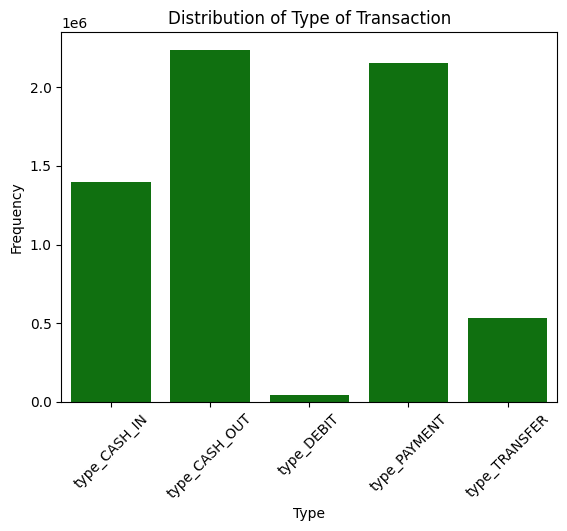

In [7]:
# Count the frequency of each transaction type
transaction_counts = df_dummies_type.sum().reset_index()
transaction_counts.columns = ['Type', 'Frequency']

# Create the bar plot
sns.barplot(x='Type', y='Frequency', data=transaction_counts, color='green')
plt.xticks(rotation=45)
plt.title('Distribution of Type of Transaction')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Inspect the 'amount' column value counts
df['amount'].value_counts()

amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64

The transaction amount 10000000.00 is the most common, occurring 3,207 times.

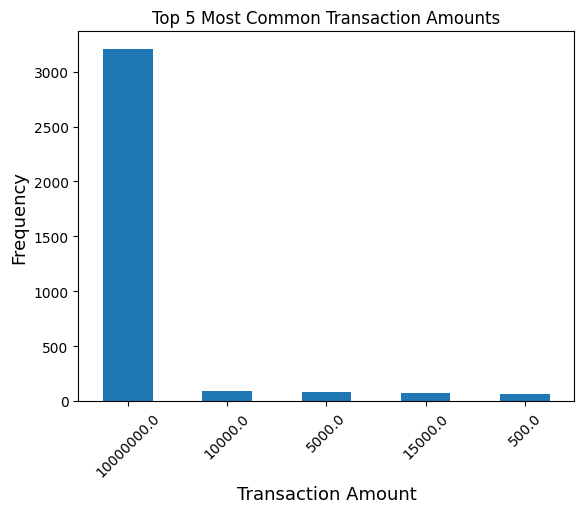

In [9]:
# Plot the top 5 most common transaction amounts
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Top 5 Most Common Transaction Amounts')
plt.xlabel('Transaction Amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(rotation= 45)
plt.show()

In [10]:
# Calculate counts of each transaction type by 'isFraud'
grouped = df.groupby('isFraud')[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum()
grouped

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


These numbers show that there are cases where fraudulent transactions have been identified in both the CASH_OUT and TRANSFER categories in the dataset.

In [11]:
df['isFlaggedFraud'].sum()

df['isFraud'].sum()

# Check if isFlaggedFraud is 1 and inspect isFraud
flagged_fraud_cases = df[df['isFlaggedFraud'] == 1]
flagged_fraud_cases

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2736446,212,4953893.08,C728984460,C639921569,1,1,0,0,0,0,1
3247297,250,1343002.08,C1100582606,C1147517658,1,1,0,0,0,0,1
3760288,279,536624.41,C1035541766,C1100697970,1,1,0,0,0,0,1
5563713,387,4892193.09,C908544136,C891140444,1,1,0,0,0,0,1
5996407,425,10000000.00,C689608084,C1392803603,1,1,0,0,0,0,1
5996409,425,9585040.37,C452586515,C1109166882,1,1,0,0,0,0,1
6168499,554,3576297.10,C193696150,C484597480,1,1,0,0,0,0,1
6205439,586,353874.22,C1684585475,C1770418982,1,1,0,0,0,0,1
6266413,617,2542664.27,C786455622,C661958277,1,1,0,0,0,0,1
6281482,646,10000000.00,C19004745,C1806199534,1,1,0,0,0,0,1


6. Model Building

The aim is training several models, then evaluating performances.

Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
# Drop the unnecessary columns correctly
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.80      0.35      0.49      1620

    accuracy                           1.00   1272524
   macro avg       0.90      0.68      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270765     139]
 [   1048     572]]


The classification report and confusion matrix provide an evaluation of the performance of your Random Forest Classifier model on predicting fraud detection.
The Classification Report The classification report includes metrics such as precision, re-call and f1-score for each class (0 and 1).
Precision Precision measures how many of the predicted positive cases (fraudulent transactions, class 1) are actually correct.
For class 0 (non-fradulent transactions): Precision: 1.00
For class 1 (fradulent transactions): Precision: 0.80
This means that when the model predicts a transaction as fraudulent (class 1), it is correct 80% of the time.
Recall Recall measures how many of the actual positive cases (fraudulent transactions) the model correctly identifies.
For class 0: Recall = 1.00
For class 1: Recall = 0.35
This indicates that the model identifies 35% of the actual fraudulent transactions.
F1-score F1-score is the harmonic mean of precision and recall, giving a single metric to evaluate the balance between precision and recall.
For class 0: F1-score = 1.00
For class 1: F1-score = 0.49
The F1-score for class 1 is relatively lower, indicating that the model's precision and recall for detecting fraudulent transactions are not as balanced as for non-fraudulent transactions.
The Confusion Matrix: The confusion matrix provides a more detailed breakdown of predictions versus actual values.
True Positives (TP): 572 - Transactions correctly predicted as fraudulent.
True Negatives (TN): 1272524 - Transactions correctly predicted as non-fraudulent.
False Positives (FP): 139 - Non-fraudulent transactions incorrectly predicted as fraudulent.
False Negatives (FN): 1048 - Fraudulent transactions incorrectly predicted as non-fraudulent.